In [8]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler

In [9]:
df=pd.read_csv(r"C:\Users\riya.garg\Desktop\customloss\CustomLoss\creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


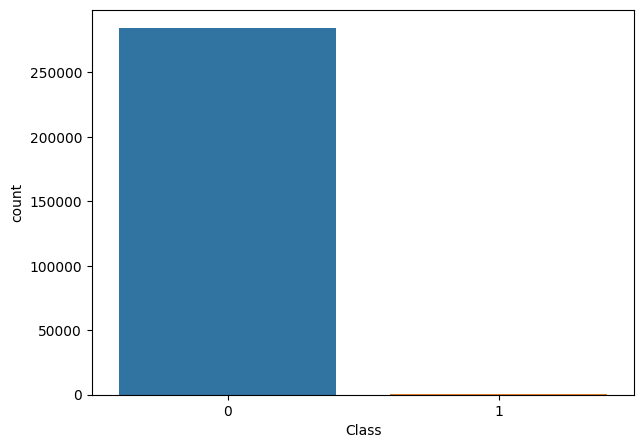

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.countplot(x=df['Class'], ax=ax)

plt.show()

In [11]:
X = df.drop('Class', axis=1)
y = df.Class

In [12]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [7]:
# Create imbalanced dataset
X, y = make_classification(n_samples=100000, n_classes=2, class_sep=2,
                            weights=[0.97, 0.03], n_informative=3, n_redundant=1, flip_y=0,
                            n_features=20, random_state=42)

# Printing the number of samples in each class
print("Number of samples in each class:")
print("Class 0: ", len(y[y==0]))
print("Class 1: ", len(y[y==1]))


Number of samples in each class:
Class 0:  97000
Class 1:  3000


In [ ]:
print(len(X))

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [13]:
#splitting the dataset into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define custom loss function
def weighted_binary_crossentropy(y_true, y_pred):
    # Convert y_true to float64
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)
    
    # Calculate class weights
    n_samples = len(y_true)
    n_positives = tf.reduce_sum(y_true)


    n_negatives = tf.cast(n_samples, tf.int32) - tf.cast(n_positives, tf.int32)
    alpha = n_negatives / n_samples
    beta = 1 - alpha
    
    # Calculate cross-entropy loss
    loss = -(beta * y_true * tf.math.log(y_pred + 1e-7) + alpha * (1 - y_true) * tf.math.log(1 - y_pred + 1e-7))
    return tf.reduce_mean(loss)

In [16]:
# Define binary classification model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [17]:
# Compile the model with custom loss function
model2.compile(optimizer='adam', loss=weighted_binary_crossentropy,metrics=['accuracy','AUC'])

In [18]:
# Train the model
X_train=tf.convert_to_tensor(X_train, dtype=tf.float64)
X_test=tf.convert_to_tensor(X_test, dtype=tf.float64)
y_train=tf.convert_to_tensor(y_train, dtype=tf.float64)
y_test=tf.convert_to_tensor(y_test, dtype=tf.float64)

model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7121/7121 [==============================] - 44s 6ms/step - loss: 0.0029 - accuracy: 0.9977 - auc: 0.6465 - val_loss: 2.9253e-04 - val_accuracy: 0.9983 - val_auc: 0.8825
Epoch 2/10
7121/7121 [==============================] - 38s 5ms/step - loss: 2.9421e-04 - accuracy: 0.9983 - auc: 0.8844 - val_loss: 2.4924e-04 - val_accuracy: 0.9983 - val_auc: 0.8775
Epoch 3/10
7121/7121 [==============================] - 43s 6ms/step - loss: 2.9085e-04 - accuracy: 0.9986 - auc: 0.9073 - val_loss: 2.7682e-04 - val_accuracy: 0.9991 - val_auc: 0.9081
Epoch 4/10
7121/7121 [==============================] - 47s 7ms/step - loss: 2.4787e-04 - accuracy: 0.9987 - auc: 0.8984 - val_loss: 2.4126e-04 - val_accuracy: 0.9988 - val_auc: 0.9081
Epoch 5/10
7121/7121 [==============================] - 58s 8ms/step - loss: 2.3130e-04 - accuracy: 0.9989 - auc: 0.9111 - val_loss: 2.4064e-04 - val_accuracy: 0.9988 - val_auc: 0.9081
Epoch 6/10
7121/7121 [==============================] - 50s 7ms/step - loss: 2.

In [19]:
# Make predictions on the testing set
y_pred = model2.predict(X_test)
y_pred_binary = np.round(y_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc_roc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUC-ROC:", auc_roc)


1781/1781 [==============================] - 8s 4ms/step
Accuracy: 0.9991573329588147
Precision: 0.9629629629629629
Recall: 0.5306122448979592
F1 score: 0.6842105263157895
AUC-ROC: 0.9662237432958551


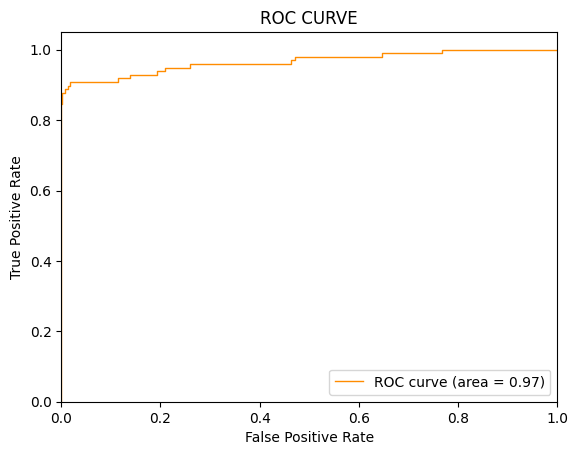

In [20]:
#plot the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % auc_roc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()